# CS675 Final Project

This project is to explore the relationship between obesity levels (target variable) and people’s eating habits associate with their physical conditions, in order to gain a better understanding about those factors contributing to high obesity levels. 

The workflow pipline will be as followed:
1. Explore the data
2. Data Visualization 
3. Feature Engineering
4. Determine models
5. Hyperparameter(s) tuning for each model
5. Evaluation / compare with different models.
7. Superlearner

In [ ]:
import pandas as pd
import numpy as np
from numpy import vstack
from numpy import hstack
from numpy import asarray
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.metrics import plot_confusion_matrix
#there is for model import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline 

## Explore the data

This section including: 
* load the data from the dataset into df
* check null value in the dataframe
* check and print the datatype of each column

Meaning of the variable:
* Gender: gender (female/male)
* Age: age (numeric value)
* Height: height (numeric value in meters)
* Weight: weight (numeric value in kilograms)
* family_history_with_overweight (yes/no)
* FAVC: Do you eat high caloric food frequently? (yes/no)
* FCVC: Do you usually eat vegetables in your meals? (never/sometimes/always)
* NCP: How many main meals do you have daily? (between 1 to 2/3/more than 3)
* CAEC: Do you eat any food between meals? (no/sometimes/frequently/always)
* SMOKE: Do you smoke? (yes/no)
* CH2O: How much water do you drink daily? (Less than a liter/ Between 1 and 2 L/More than 2 L)
* SCC: Do you monitor the calories you eat daily? (yes/no)
* FAF: How often do you have physical activity?( I do not have/ 1 or 2 days/ 2 or 4 days/ 4 or 5 days)
* TUE: How much time do you use technological devices such as cell phone, videogames, television, computer and others?( 0–2 hours/ 3–5 hours/More than 5 hours)
* CALC: how often do you drink alcohol?( I do not drink/ Sometimes/ Frequently/ Always)
* MTRANS: Which transportation do you usually use? (Automobile/Motorbike/ Bike/Public Transportation/ Walking)
* NObeyesdad: Obesity Level


In [ ]:
df_raw = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv') # read obesity data
df = df_raw

In [ ]:
df.isnull().sum() # check empty value 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.dtypes # check data type

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
# all the numerical columns. Since we don't have type "int", we only care "float" type
numerical_features = df.select_dtypes(include =['float']).columns 
numerical_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [ ]:
categorical_features = df.select_dtypes(include =['object']).columns # all the categorical columns
categorical_features

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Data Visualization

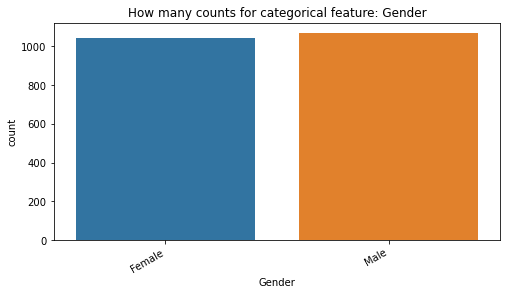

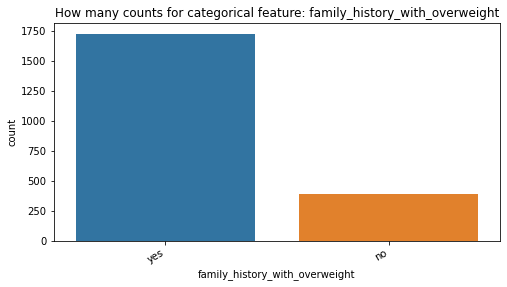

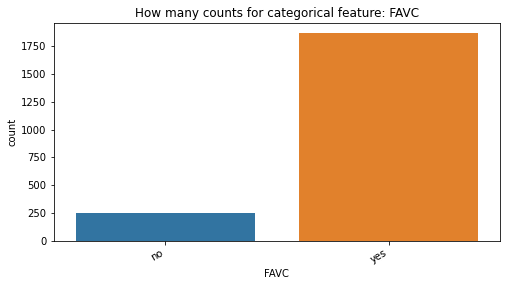

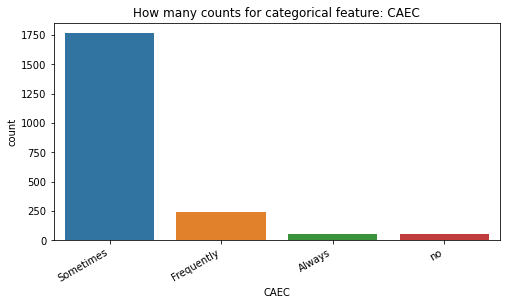

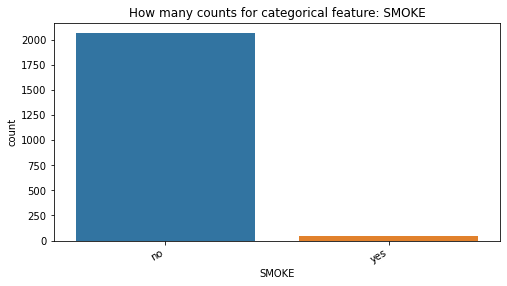

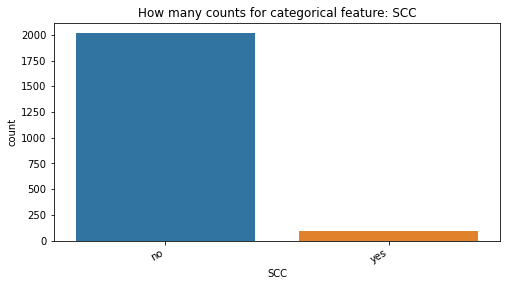

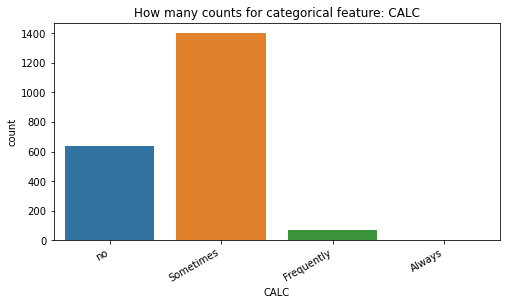

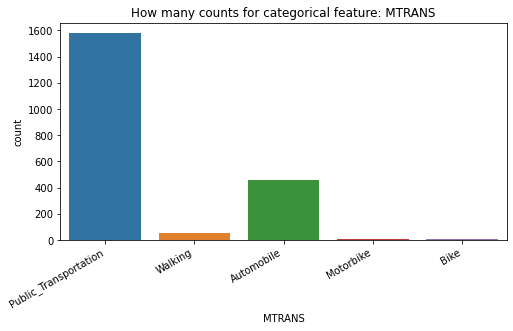

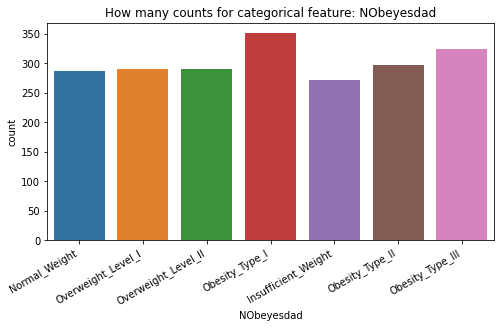

In [ ]:
#let's have a first peek at all the categorical features

for categorical_feature in categorical_features:
    plt.figure(figsize=(8,4)) 
    ax = sns.countplot(x= categorical_feature,data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_title('How many counts for categorical feature: {}'.format(categorical_feature))

Notice from the above plots, our target features (Nobeyesdad) look balance. Thats what we want, since balance data gives us equal amout of information so that we can have a better understanding for test data. Some of the other explanatory features don't look balance, but that is ok because we will perform PCA to choose the best principal components.

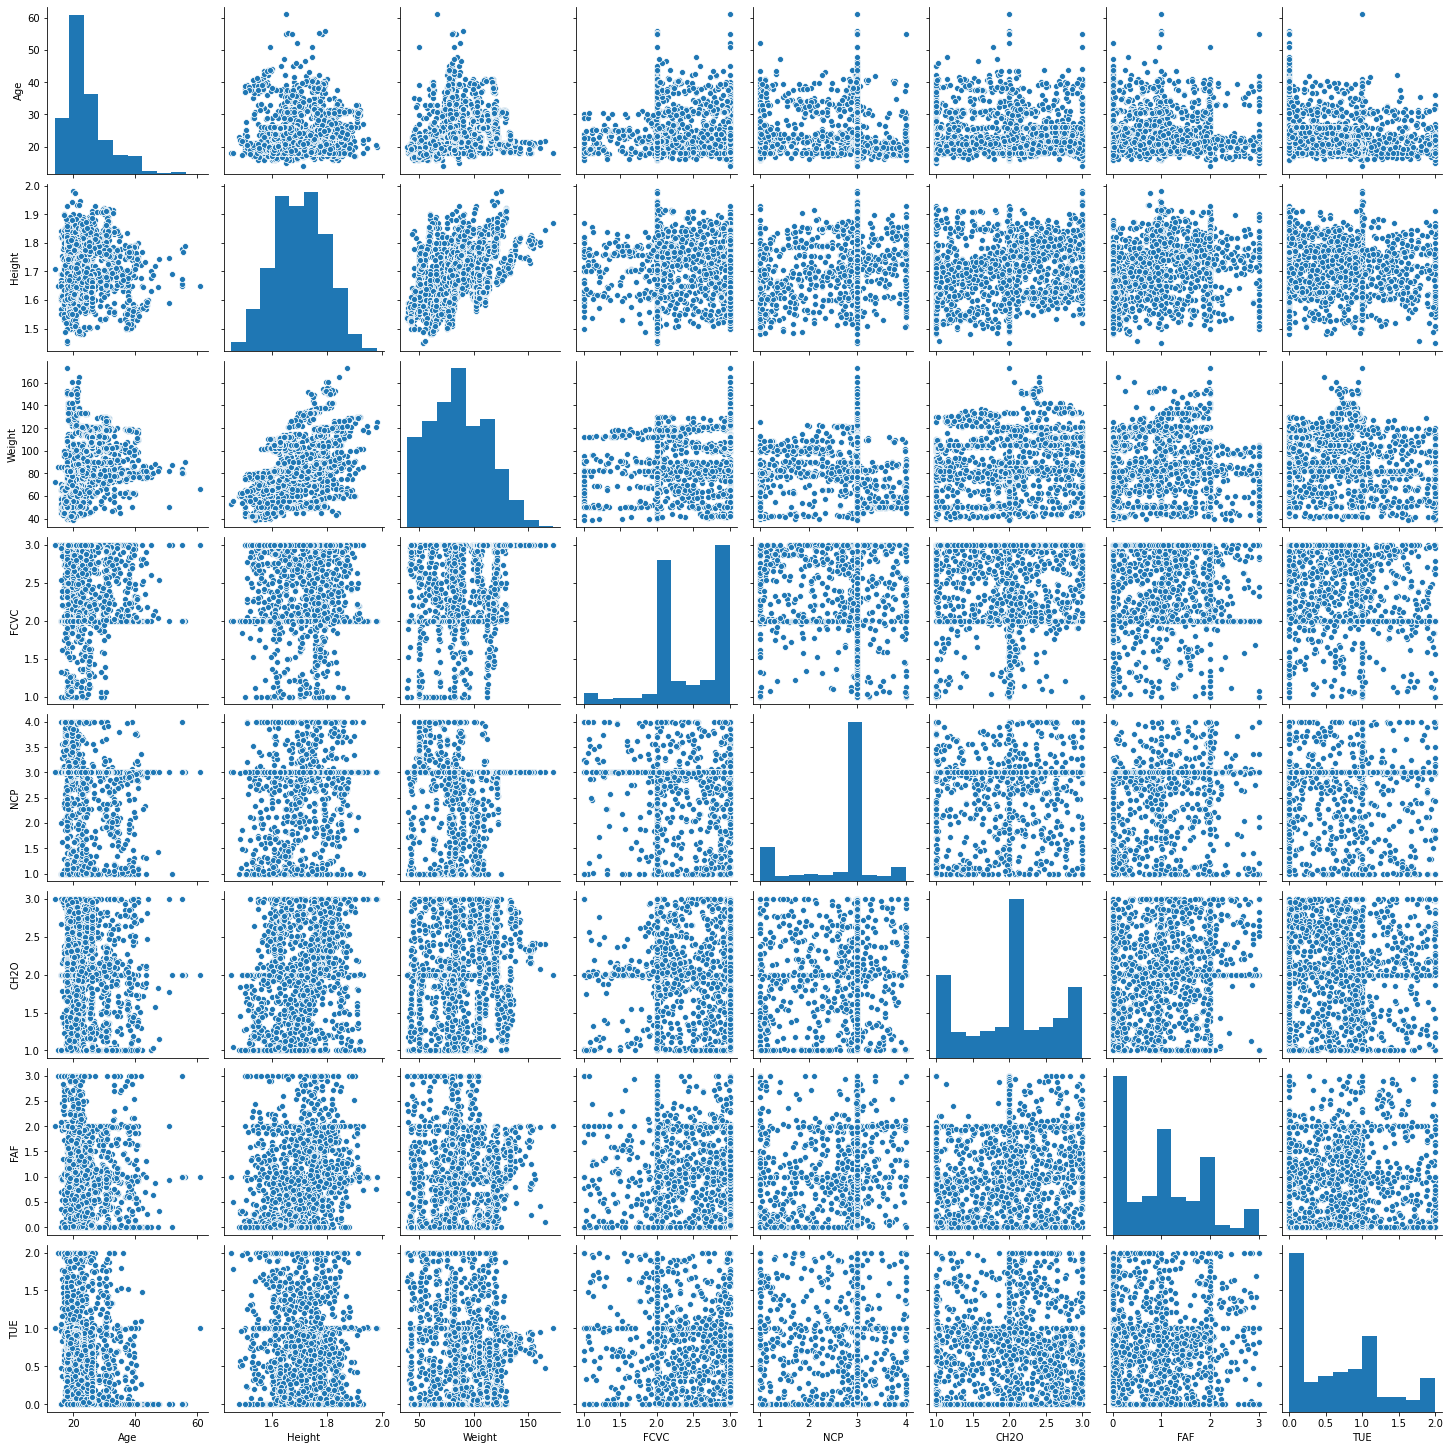

In [ ]:
#let's also have a first peek at all the numerical features
sns.pairplot(df)

For the numerical features in the pair plot, it seems like only weight-height features have collinearity. Other pairs of features doesn't have obvious relationships. Next let's see the stats for numerical features correlations.

In [ ]:
df.corr()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

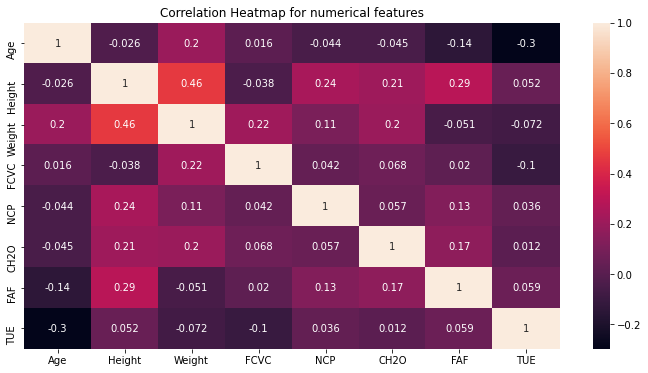

In [ ]:
# we can use heatmap to see the relationship directly. The lighter the color, the greater the relationship
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(),  annot=True)
heatmap.set_title('Correlation Heatmap for numerical features');

We can tell from the heatmap that weight and height do have correlation but the relation is not strong. Next, let's see the barplot for obesity-level - weight and obesity-level - height

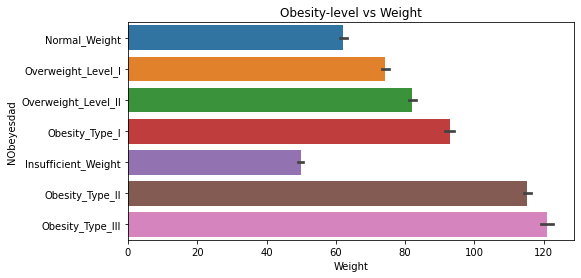

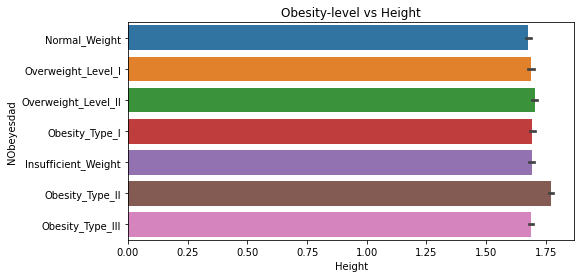

In [ ]:
for feature in ['Weight','Height']:
    plt.figure(figsize=(8,4)) 
    ax = sns.barplot(x= feature,y='NObeyesdad',data=df)
    ax.set_title('Obesity-level vs {}'.format(feature))

According to the above barplot, it looks like weight has strong relationship with obesity level

<Figure size 576x288 with 0 Axes>

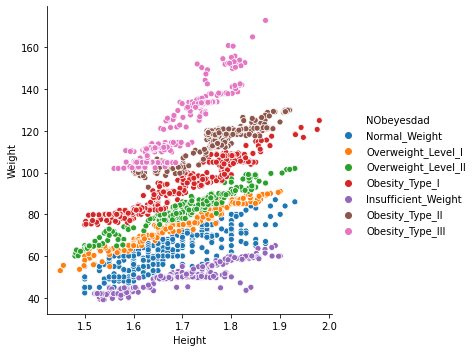

In [ ]:
# In our project proposal, we suspect wight and height is determinant for Obesity-level. 
# We plot the relationship between Height, Weight and Obesity level as followed.

plt.figure(figsize=(8,4)) 
ax = sns.relplot(data=df, x="Height", y="Weight", hue="NObeyesdad")

Based on the above plot, it is explicit that weight and height can determine obesity level. We also check the paper of the obesity dataset, we found that obesity is calculated from weight and height. Therefore, we need to exclude them from our dataset.

## Feature Engineering

This section including:
* perform encoding method for categorical features
    * one-hot encoding for features don't have explicit ordinal relation
    * label encoding for features do have explicit ordinal relation
* Feature Selection based on the visualization result 

In [ ]:
# check all the values for categorical features
for i in categorical_features:
    print('categorical feature: {} has unique values: {}\n'.format(i,np.unique(df[i])))
print()

categorical feature: Gender has unique values: ['Female' 'Male']

categorical feature: family_history_with_overweight has unique values: ['no' 'yes']

categorical feature: FAVC has unique values: ['no' 'yes']

categorical feature: CAEC has unique values: ['Always' 'Frequently' 'Sometimes' 'no']

categorical feature: SMOKE has unique values: ['no' 'yes']

categorical feature: SCC has unique values: ['no' 'yes']

categorical feature: CALC has unique values: ['Always' 'Frequently' 'Sometimes' 'no']

categorical feature: MTRANS has unique values: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']

categorical feature: NObeyesdad has unique values: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']




In [ ]:
# put one-hot encoding on feature "Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS" 
# because these features don't have a explicit oridinal relationship

df = pd.get_dummies(df, columns = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'])
df

Age    Height      Weight  FCVC  NCP       CAEC      CH2O  \
0     21.000000  1.620000   64.000000   2.0  3.0  Sometimes  2.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  Sometimes  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  Sometimes  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  Sometimes  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  Sometimes  2.000000   
...         ...       ...         ...   ...  ...        ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  Sometimes  1.728139   
2107  21.982942  1.748584  133.742943   3.0  3.0  Sometimes  2.005130   
2108  22.524036  1.752206  133.689352   3.0  3.0  Sometimes  2.054193   
2109  24.361936  1.739450  133.346641   3.0  3.0  Sometimes  2.852339   
2110  23.664709  1.738836  133.472641   3.0  3.0  Sometimes  2.863513   

           FAF       TUE        CALC  ... FAVC_yes  SMOKE_no  SMOKE_yes  \
0     0.000000  1.000000          no  ...        0         1          0   
1     3.000000  0.000000   Sometimes  ...        0         0          1   
2     2.000000  1.000000  Frequently  ...        0         1          0   
3     2.000000  0.000000  Frequently  ...        0         1          0   
4     0.000000  0.000000   Sometimes  ...        0         1          0   
...        ...       ...         ...  ...      ...       ...        ...   
2106  1.676269  0.906247   Sometimes  ...        1         1          0   
2107  1.341390  0.599270   Sometimes  ...        1         1          0   
2108  1.414209  0.646288   Sometimes  ...        1         1          0   
2109  1.139107  0.586035   Sometimes  ...        1         1          0   
2110  1.026452  0.714137   Sometimes  ...        1         1          0   

      SCC_no  SCC_yes  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0          1        0                  0            0                 0   
1          0        1                  0            0                 0   
2          1        0                  0            0                 0   
3          1        0                  0            0                 0   
4          1        0                  0            0                 0   
...      ...      ...                ...          ...               ...   
2106       1        0                  0            0                 0   
2107       1        0                  0            0                 0   
2108       1        0                  0            0                 0   
2109       1        0                  0            0                 0   
2110       1        0                  0            0                 0   

      MTRANS_Public_Transportation  MTRANS_Walking  
0                                1               0  
1                                1               0  
2                                1               0  
3                                0               1  
4                                1               0  
...                            ...             ...  
2106                             1               0  
2107                             1               0  
2108                             1               0  
2109                             1               0  
2110                             1               0  

[2111 rows x 26 columns]

In [ ]:
# perform label encoding on features "CAEC", "CALC", "NObeyesdad" because these features 
# do have explicit ordinal meaning

def label_CAEC_CALC(x):
    if x == 'Always':
        return 3
    elif x == 'Frequently':
        return 2
    elif x == 'Sometimes':
        return 1
    else:
        return 0
    

def label_target(x):
    if x == 'Insufficient_Weight':
        return 0
    elif x == 'Normal_Weight':
        return 1
    elif x == 'Obesity_Type_I':
        return 2
    elif x == 'Obesity_Type_II':
        return 3
    elif x == 'Obesity_Type_III':
        return 4
    elif x == 'Overweight_Level_I':
        return 5
    else:
        return 6
    
df['CAEC'] = df['CAEC'].apply(label_CAEC_CALC)
df['CALC'] = df['CALC'].apply(label_CAEC_CALC)
df['NObeyesdad'] = df['NObeyesdad'].apply(label_target)
df.head()

Age  Height  Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  ...  FAVC_yes  \
0  21.0    1.62    64.0   2.0  3.0     1   2.0  0.0  1.0     0  ...         0   
1  21.0    1.52    56.0   3.0  3.0     1   3.0  3.0  0.0     1  ...         0   
2  23.0    1.80    77.0   2.0  3.0     1   2.0  2.0  1.0     2  ...         0   
3  27.0    1.80    87.0   3.0  3.0     1   2.0  2.0  0.0     2  ...         0   
4  22.0    1.78    89.8   2.0  1.0     1   2.0  0.0  0.0     1  ...         0   

   SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  MTRANS_Automobile  MTRANS_Bike  \
0         1          0       1        0                  0            0   
1         0          1       0        1                  0            0   
2         1          0       1        0                  0            0   
3         1          0       1        0                  0            0   
4         1          0       1        0                  0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                 0                             1               0  
1                 0                             1               0  
2                 0                             1               0  
3                 0                             0               1  
4                 0                             1               0  

[5 rows x 26 columns]

In [ ]:
# According to Visulization Part, since we don't need features "Weight" and "Height", we can delete them now
df = df.drop(columns=['Height', 'Weight'])
df.head()

Age  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  NObeyesdad  Gender_Female  \
0  21.0   2.0  3.0     1   2.0  0.0  1.0     0           1              1   
1  21.0   3.0  3.0     1   3.0  3.0  0.0     1           1              1   
2  23.0   2.0  3.0     1   2.0  2.0  1.0     2           1              0   
3  27.0   3.0  3.0     1   2.0  2.0  0.0     2           5              0   
4  22.0   2.0  1.0     1   2.0  0.0  0.0     1           6              0   

   ...  FAVC_yes  SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  MTRANS_Automobile  \
0  ...         0         1          0       1        0                  0   
1  ...         0         0          1       0        1                  0   
2  ...         0         1          0       1        0                  0   
3  ...         0         1          0       1        0                  0   
4  ...         0         1          0       1        0                  0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0            0                 0                             1               0  
1            0                 0                             1               0  
2            0                 0                             1               0  
3            0                 0                             0               1  
4            0                 0                             1               0  

[5 rows x 24 columns]

# Determine models

This section including: 
* Build the following models:
    * LDA
    * K-nearest-neighbor
    * Naive Bayes
    * Ensemble method:
        * Bagging: Random Forest
        * Boosting: Adaboosting, XGboosting, Catboosting
    * Neural Network
* Define X and y
* Use Random Search to search different combinations of hyparameters
* Perform cross-validation
* Perform Normalization (Min-Max Scaler)
* Compare different models accuracy after hyparameters tuning
* Compute confusion matrix


In [ ]:
# Let define the model we will use, notice that these models don't have any parameters
# we will fill in the paramters by using 

Lda_clf = LinearDiscriminantAnalysis() # LDA
knn_clf = KNeighborsClassifier() # KNN
Cat_clf = CategoricalNB() # categorical Naive Bayes
Gaussian_clf = GaussianNB() # Gaussian Naive Bayes
rf_clf = RandomForestClassifier() # random forest classifier
AdaBoost_clf = AdaBoostClassifier() #AdaBoost Classifier
XGBoost_clf = XGBClassifier(use_label_encoder=False) #XGBOOST
CatBoost_clf = CatBoostClassifier() #CatBoost
nn_clf = MLPClassifier() # Neural Net

In [ ]:
# Now we are ready to define X and y 
X = np.array(df.drop(columns=['NObeyesdad']))
y = np.array(df['NObeyesdad'])

In [ ]:
# Now we are ready to perform K-fold cross-validation to maximize the usuage of our data.
# We can also use min-max normalization to the data, because most of the features are encoding
# from categorical features and according to the visualization part, there is no prior distribution
# we need to know, therefore, we prefer to use normalization instead of standardization 

# split train-validation , test data
X_train_validation, X_test, y_train_validaiton, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_validation)
X_test_scaled = scaler.transform(X_test)

train_model_dic = {}

For each model above, we use RandomizedSearchCV method that find the best hyperparameters.

notice that RandomizedSearchCV uses cross-validation

In [ ]:
# For Categorical Naive Bayes, Gaussian Naive Bayes, we don't have much hyperparameters to tune
# but we do know the prior class proportions from the trainning data.
class_proportion = dict()
for i in y_train_validaiton:
    if i not in class_proportion.keys():
        class_proportion[i] = 1
    else:
        class_proportion[i] += 1

for i in class_proportion.keys():
    print("class {} has proportion : {}".format(i, round(class_proportion[i]/len(y_train_validaiton),2) ))

prior = [0.12,0.14,0.17,0.14,0.15,0.14,0.14]

class 2 has proportion : 0.17
class 3 has proportion : 0.14
class 0 has proportion : 0.12
class 5 has proportion : 0.14
class 1 has proportion : 0.14
class 4 has proportion : 0.15
class 6 has proportion : 0.14


Find best hyperparamters for LDA

In [ ]:
#lda_param_grid = {"solver": ["svd","lsqr","eigen"], "shrinkage":["auto",None]}

#Since shrinkage doesn't applied for SVD, so we have two random_grids and we will compare their scores
lda_param_grid1 = {"solver": ["svd","lsqr"]}
lda_param_grid2 = {"solver": ["lsqr"], "shrinkage":["auto",None]}
#LDA 
lda_search1 = RandomizedSearchCV(estimator=Lda_clf, param_distributions=lda_param_grid1, n_iter=2, random_state=1, cv = 10)
lda_search2 = RandomizedSearchCV(estimator=Lda_clf, param_distributions=lda_param_grid2, n_iter=2, random_state=1, cv = 10)
lda_search1.fit(X_train_scaled, y_train_validaiton)
lda_search2.fit(X_train_scaled, y_train_validaiton)
print(lda_search1.best_params_)
print(lda_search1.best_score_)
print(lda_search2.best_params_)
print(lda_search2.best_score_)

train_model_dic['LDA'] = lda_search2.best_score_

{'solver': 'svd'}
0.5627958579881657
{'solver': 'lsqr', 'shrinkage': None}
0.5627958579881657


Find best hyperparamters for KNN

In [ ]:
n_neighbors = np.arange(1,10,1)
weights = ['uniform','distance']
p = [1,2]
param_grid = {"n_neighbors": n_neighbors, "weights":weights, "p" : p}
knn_search = RandomizedSearchCV(estimator=knn_clf, param_distributions=param_grid, n_iter=20, random_state=1, cv = 10)
knn_search.fit(X_train_scaled, y_train_validaiton)
print(knn_search.best_params_)
print(knn_search.best_score_)

train_model_dic['KNN'] = knn_search.best_score_

{'weights': 'distance', 'p': 1, 'n_neighbors': 5}
0.7784657650042266


Find hyperparamters for Random Forest

In [ ]:
n_estimators = np.arange(10, 200, 10)
max_depth = np.arange(1, 20, 1)
max_leaf_nodes = np.arange(20,50,1)
min_samples_split = np.arange(2, 20, 1)
min_samples_leaf = np.arange(1, 10, 1)
max_features = np.arange(1,8,1)
rf_param_grid = {"n_estimators": n_estimators, 
                 "criterion":["gini","entropy"], 
                 "max_depth" : max_depth, 
                 "max_leaf_nodes":max_leaf_nodes,
                 "min_samples_split": min_samples_split,
                 "min_samples_leaf":min_samples_leaf,
                 "max_features" : max_features}
rf_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=rf_param_grid, n_iter=100, random_state=1, cv = 10)
rf_search.fit(X_train_scaled, y_train_validaiton)
print(rf_search.best_params_)
print(rf_search.best_score_)

train_model_dic['random Forest'] = rf_search.best_score_

{'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 46, 'max_features': 5, 'max_depth': 18, 'criterion': 'gini'}
0.7677867004790081


Find hyperparamters for AdaBoost, XGBoost, CatBoost

In [ ]:
n_estimators = np.arange(10, 200, 10)
learning_rate = [1,0.1, 0.01, 0.001, 10]
param_grid = {"n_estimators":n_estimators, "learning_rate":learning_rate}
ada_search = RandomizedSearchCV(estimator=AdaBoost_clf, param_distributions=param_grid, n_iter=10, random_state=1)
ada_search.fit(X_train_scaled, y_train_validaiton)
print(ada_search.best_params_)
print(ada_search.best_score_)

train_model_dic['AdaBoost'] = ada_search.best_score_

{'n_estimators': 130, 'learning_rate': 0.1}
0.42537179779818446


In [ ]:
n_esitmators = np.arange(10, 200, 10)
max_depth = np.arange(1, 20, 1)
learning_rate = [1,0.1,0.01,0.001,0.0001,10]
booster = ['gbtree','dart']
use_label_encoder = [False]
eval_metric = ['mlogloss','auc']
eta = [1]
param_grid = {"n_estimators":n_estimators, 
              "learning_rate":learning_rate,
              "max_depth" : max_depth, 
              "booster" : booster, 
              "use_label_encoder" : use_label_encoder, 
              "eval_metric":eval_metric,
              "eta" : [1]}
XGB_search = RandomizedSearchCV(estimator=XGBoost_clf, param_distributions=param_grid, n_iter=10, random_state=1)
XGB_search.fit(X_train_scaled, y_train_validaiton)
print(XGB_search.best_params_)
print(XGB_search.best_score_)

train_model_dic['XGBoost'] = XGB_search.best_score_

{'use_label_encoder': False, 'n_estimators': 120, 'max_depth': 8, 'learning_rate': 1, 'eval_metric': 'mlogloss', 'eta': 1, 'booster': 'gbtree'}
0.8305778448896458


In [ ]:
# Note that 'AUC' maynot work in all case, may result in warning

iterations = [100,200,500,1000]
learning_rate = [1,0.1,0.01,0.001,]
eval_metric = ['Logloss', 'AUC']
depth= np.arange(1, 10, 1)
param_grid = {"iterations" : iterations, 
              "learning_rate":learning_rate, 
              #"eval_metric":eval_metric,
              "depth":depth}
Cat_search = RandomizedSearchCV(estimator=CatBoost_clf, param_distributions=param_grid, n_iter=10, random_state=1)
Cat_search.fit(X_train_scaled, y_train_validaiton)
print(Cat_search.best_params_)
print(Cat_search.best_score_)
train_model_dic['CatBoost'] = Cat_search.best_score_

# here we also test another catboost without using eval metric 
best_catboost_train = CatBoostClassifier(iterations=200, learning_rate=0.1,depth=9) #CatBoost
best_catboost_train.fit(X_train_scaled,y_train_validaiton)
train_model_dic['CatBoost'] = best_catboost_train.score(X_test_scaled, y_test)

0:	learn: 1.9310606	total: 67ms	remaining: 1m 6s
1:	learn: 1.9184875	total: 75ms	remaining: 37.4s
2:	learn: 1.9077986	total: 83.7ms	remaining: 27.8s
3:	learn: 1.8957691	total: 92.1ms	remaining: 22.9s
4:	learn: 1.8820367	total: 101ms	remaining: 20.1s
5:	learn: 1.8680224	total: 109ms	remaining: 18s
6:	learn: 1.8553819	total: 118ms	remaining: 16.7s
7:	learn: 1.8441333	total: 126ms	remaining: 15.6s
8:	learn: 1.8329158	total: 133ms	remaining: 14.7s
9:	learn: 1.8210953	total: 141ms	remaining: 14s
10:	learn: 1.8099430	total: 151ms	remaining: 13.5s
11:	learn: 1.8014475	total: 163ms	remaining: 13.4s
12:	learn: 1.7923324	total: 177ms	remaining: 13.5s
13:	learn: 1.7808357	total: 190ms	remaining: 13.4s
14:	learn: 1.7705441	total: 205ms	remaining: 13.5s
15:	learn: 1.7594312	total: 214ms	remaining: 13.1s
16:	learn: 1.7504927	total: 222ms	remaining: 12.8s
17:	learn: 1.7407982	total: 230ms	remaining: 12.6s
18:	learn: 1.7314170	total: 239ms	remaining: 12.4s
19:	learn: 1.7227201	total: 248ms	remaining: 

Find hyperparamters for Neural Network

In [ ]:
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['sgd', 'adam']
alpha  = [0.000001, 0.00001, 0.0001] 
learning_rate_init = [0.1,0.001,0.01]
max_iter = [500,1000,2000,5000]

parameters = {
              "hidden_layer_sizes": [(10,), (100,), (50,)],
              "activation":activation, 
              "solver": solver , 
              "alpha" : alpha,
              "learning_rate_init":learning_rate_init,
              "max_iter" : max_iter
    
}
             
NN_search = RandomizedSearchCV(estimator = nn_clf, param_distributions= parameters, n_iter=10, random_state=1)
NN_search.fit(X_train_validation, y_train_validaiton)
print(NN_search.best_params_)
print(NN_search.best_score_)

train_model_dic['Neural Network'] = NN_search.best_score_

{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'alpha': 1e-06, 'activation': 'relu'}
0.7245307534282655


In [ ]:
## ADD UNTUNNING MODEL TO THE DICT

CatBoost_clf_wt = CatBoostClassifier()
CatBoost_clf_wt.fit(X_train_scaled,y_train_validaiton)
train_model_dic['CatBoost without tunning'] = CatBoost_clf_wt.score(X_test_scaled, y_test)

rf_clf_wt = RandomForestClassifier()
rf_clf_wt.fit(X_train_scaled,y_train_validaiton)
train_model_dic['Random Forest without tunning'] = rf_clf_wt.score(X_test_scaled, y_test)

XGBoost_clf_wt = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
XGBoost_clf_wt.fit(X_train_scaled,y_train_validaiton)
train_model_dic['XGBoost without tunning'] =XGBoost_clf_wt.score(X_test_scaled, y_test)

nn_clf_wt = MLPClassifier()
nn_clf_wt.fit(X_train_scaled,y_train_validaiton)
train_model_dic['Neural Network without tunning'] = nn_clf_wt.score(X_test_scaled, y_test)

knn_clf_wt = KNeighborsClassifier()
knn_clf_wt.fit(X_train_scaled,y_train_validaiton)
train_model_dic['KNN without tunning'] =  knn_clf_wt.score(X_test_scaled, y_test)

Learning rate set to 0.081268
0:	learn: 1.8320382	total: 20.3ms	remaining: 20.3s
1:	learn: 1.7427881	total: 33.1ms	remaining: 16.5s
2:	learn: 1.6747147	total: 43.5ms	remaining: 14.5s
3:	learn: 1.6027883	total: 53.4ms	remaining: 13.3s
4:	learn: 1.5389293	total: 64.8ms	remaining: 12.9s
5:	learn: 1.4837324	total: 77.7ms	remaining: 12.9s
6:	learn: 1.4363393	total: 86.3ms	remaining: 12.2s
7:	learn: 1.3927334	total: 104ms	remaining: 12.9s
8:	learn: 1.3469026	total: 120ms	remaining: 13.2s
9:	learn: 1.3101588	total: 135ms	remaining: 13.3s
10:	learn: 1.2784901	total: 155ms	remaining: 13.9s
11:	learn: 1.2553880	total: 173ms	remaining: 14.3s
12:	learn: 1.2215031	total: 190ms	remaining: 14.4s
13:	learn: 1.1906163	total: 211ms	remaining: 14.8s
14:	learn: 1.1659503	total: 240ms	remaining: 15.8s
15:	learn: 1.1428423	total: 262ms	remaining: 16.1s
16:	learn: 1.1200267	total: 278ms	remaining: 16.1s
17:	learn: 1.0982904	total: 294ms	remaining: 16s
18:	learn: 1.0761312	total: 310ms	remaining: 16s
19:	lear

/Users/diwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
sorted_train_model_dic = {k: v for k, v in sorted(train_model_dic.items(), key=lambda item: -item[1])}
for i in sorted_train_model_dic:
    print('model {} has Mean cross-validated score of the best_estimator {}'.format(i,train_model_dic[i]))

model CatBoost without tunning has Mean cross-validated score of the best_estimator 0.8581560283687943
model CatBoost has Mean cross-validated score of the best_estimator 0.851063829787234
model XGBoost without tunning has Mean cross-validated score of the best_estimator 0.8439716312056738
model Random Forest without tunning has Mean cross-validated score of the best_estimator 0.8416075650118203
model XGBoost has Mean cross-validated score of the best_estimator 0.8305778448896458
model KNN has Mean cross-validated score of the best_estimator 0.7784657650042266
model random Forest has Mean cross-validated score of the best_estimator 0.7677867004790081
model Neural Network has Mean cross-validated score of the best_estimator 0.7245307534282655
model Neural Network without tunning has Mean cross-validated score of the best_estimator 0.7210401891252955
model KNN without tunning has Mean cross-validated score of the best_estimator 0.6926713947990544
model LDA has Mean cross-validated score 

In [ ]:
df_training_model_accuracy = pd.DataFrame(columns = ['Model','Model Accuracy for training data'])

for k, v in sorted_train_model_dic.items():
    df_training_model_accuracy.loc[len(df_training_model_accuracy)] = [k, v]
df_training_model_accuracy 

Model  Model Accuracy for training data
0         CatBoost without tunning                          0.858156
1                         CatBoost                          0.851064
2          XGBoost without tunning                          0.843972
3    Random Forest without tunning                          0.841608
4                          XGBoost                          0.830578
5                              KNN                          0.778466
6                    random Forest                          0.767787
7                   Neural Network                          0.724531
8   Neural Network without tunning                          0.721040
9              KNN without tunning                          0.692671
10                             LDA                          0.562796
11                        AdaBoost                          0.425372

In [ ]:
# According to the above dataset, we found that For training data, CatBoost, XGBoost and Neural Network 
# has a little bit higher accuracy than tunned model, but random forest untunned model has even higher accuarcy 
# Since CatBoost, XGBoost and Neural Network don't have much different compare tunned and untunned model, we will 
# mainly focused on random forest

#let's look at the difference for random forest tunned and tunned parameters
print('---------this is for Random Forest without tuning hyperparameters---------')
print(rf_clf_wt.get_params())
print('---------this is for Random Forest ---------')
print(rf_search.best_params_)
print()

# we can also check CatBoost, XGBoost and Neural Network untuning parameters
print('---------this is for CatBoost without tuning hyperparameters---------')
print(CatBoost_clf_wt.get_all_params())
print('---------this is for CatBoost ---------')
print(Cat_search.best_params_)
print()
print('---------this is for XGBoost without tuning hyperparameters---------')
print(XGBoost_clf_wt.get_params())
print('---------this is for XGBoost ---------')
print(XGB_search.best_params_)
print()
print('---------this is for Neural Network without tuning hyperparameters---------')
print(nn_clf_wt.get_params())
print('---------this is for Neural Network ---------')
print(NN_search.best_params_)


---------this is for Random Forest without tuning hyperparameters---------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
---------this is for Random Forest ---------
{'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 46, 'max_features': 5, 'max_depth': 18, 'criterion': 'gini'}

---------this is for CatBoost without tuning hyperparameters---------
{'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_m

In [ ]:
# After several tries, We found that that max_depth and max_leaf_nodes are the 
# main reason results in a bad performance, so we set them to default.

n_estimators = np.arange(10, 200, 10)

# --------set to default----------
# max_depth = np.arange(1, 20, 1)
# max_leaf_nodes = np.arange(20,50,1)
# --------------------------------
min_samples_split = np.arange(2, 20, 1)
min_samples_leaf = np.arange(1, 10, 1)

rf_param_grid = {"n_estimators": n_estimators, 
                 "min_samples_split": min_samples_split,
                 "min_samples_leaf":min_samples_leaf}

rf_clf = RandomForestClassifier(max_features = 'auto',criterion = 'gini', max_depth = None, max_leaf_nodes = None)

rf_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=rf_param_grid, n_iter=100, random_state=1, cv = 10)
rf_search.fit(X_train_scaled, y_train_validaiton)
print(rf_search.best_params_)
print(rf_search.best_score_)

{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1}
0.8596189067342914


Redefine the classifier based on their optimal hyperparameters

In [ ]:
# Let define the model we will be using
Lda_clf = LinearDiscriminantAnalysis(solver = 'svd',
                                     shrinkage = None) # LDA

Cat_clf = CategoricalNB(class_prior = prior) # categorical Naive Bayes

Gaussian_clf = GaussianNB(priors = prior) # Gaussian Naive Bayes

knn_clf = KNeighborsClassifier(weights = 'distance', 
                               p = 2, 
                               n_neighbors = 1) # K Nearest Neighbor 

rf_clf = RandomForestClassifier(n_estimators = 70,
                                min_samples_split = 2,
                                min_samples_leaf = 1, 
                                max_leaf_nodes = None,
                                max_features = 5,
                                max_depth = None,
                                criterion = 'gini') # random forest classifier


rf_clf_wt = RandomForestClassifier() #random forest without tunning

        
AdaBoost_clf = AdaBoostClassifier(n_estimators = 130, learning_rate = 0.1) #AdaBoost

AdaBoost_clf_wt = AdaBoostClassifier() #AdaBoost Without Tuning


XGBoost_clf = XGBClassifier(use_label_encoder=False, 
                            n_estimators = 120, 
                            eval_metric='mlogloss', 
                            max_depth= 8, 
                            learning_rate = 1, 
                            eta = 1, 
                            booster = 'gbtree') #XGBOOST

XGBoost_clf_wt = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') #XGBOOST without tuning

CatBoost_clf = CatBoostClassifier(iterations=200, 
                                  learning_rate=0.1,
                                  depth=9) #CatBoost

CatBoost_clf_wt = CatBoostClassifier() #CatBoost without tuning 

nn_clf = MLPClassifier(solver = 'adam', 
                       max_iter = 5000,
                       learning_rate_init = 0.001, 
                       hidden_layer_sizes = (100,),
                       alpha = 1e-06, 
                       activation = 'relu') # Neural Net

nn_clf_wt = MLPClassifier() # NN without tuning

In [ ]:
dic = { 'Lda classifier': Lda_clf, 
        'Knn classifier': knn_clf,
        'Categorial naive bayes':Cat_clf, 
        'Gaussian naive bayes': Gaussian_clf,
        'random forest classifer':rf_clf,
        'random forest classifer (without tunning)': rf_clf_wt,
        'AdaBoost classifier': AdaBoost_clf,
        'AdaBoost classifier2 (without tunning)': AdaBoost_clf_wt,
        'XGBoost classifier':XGBoost_clf,
        'XGBoost classifier2 (without tunning)':XGBoost_clf_wt,
        'CatBoost classifier':CatBoost_clf,
        'CatBoost classifier2 (without tunning)':CatBoost_clf_wt,
        'Neural Network classifier':nn_clf, 
        'Neural Network classifier2 (without tunning)': nn_clf_wt
      }

df_model_matrix = pd.DataFrame(columns = ['Model Name', 'Model Accuracy for test data'])
df_confusion_matrix = pd.DataFrame(columns = ['Model Name',
                                              'Class Label',
                                              'True Nagative', 
                                              'False Positive', 
                                              'False Negative', 
                                              'True Positive'])

for i, (name, clf) in enumerate(dic.items()):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_validation)
    X_test_scaled = scaler.transform(X_test)
    clf.fit(X_train_scaled, y_train_validaiton)
    print()
    predict = clf.predict(X_test_scaled)
    acc = accuracy_score(predict , y_test)  
    print('For {}: the accuarcy score is :{}\n'.format(name, acc))
    df_model_matrix.loc[len(df_model_matrix)] = [name, acc ]
    
    # multi-class confusion matrix
    confusion_array = multilabel_confusion_matrix(y_test, predict)
    #print(confusion_array)
    for i in range(len(confusion_array)):
        confusion_row = []
        confusion_row.append(name)
        confusion_row.append(i)
        confusion_row.extend(confusion_array[i].reshape(-1, 4)[0])
        df_confusion_matrix.loc[len(df_confusion_matrix)] = confusion_row
    


For Lda classifier: the accuarcy score is :0.5791962174940898


For Knn classifier: the accuarcy score is :0.7494089834515366


For Categorial naive bayes: the accuarcy score is :0.5224586288416075


For Gaussian naive bayes: the accuarcy score is :0.3735224586288416


For random forest classifer: the accuarcy score is :0.8534278959810875


For random forest classifer (without tunning): the accuarcy score is :0.8439716312056738


For AdaBoost classifier: the accuarcy score is :0.45390070921985815


For AdaBoost classifier2 (without tunning): the accuarcy score is :0.3877068557919622


For XGBoost classifier: the accuarcy score is :0.8463356973995272


For XGBoost classifier2 (without tunning): the accuarcy score is :0.8439716312056738

0:	learn: 1.8066067	total: 68.2ms	remaining: 13.6s
1:	learn: 1.6907819	total: 123ms	remaining: 12.2s
2:	learn: 1.5933989	total: 204ms	remaining: 13.4s
3:	learn: 1.5140510	total: 266ms	remaining: 13s
4:	learn: 1.4383226	total: 318ms	remaining: 12.4s
5:	l

/Users/diwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df_model_matrix.sort_values(by=['Model Accuracy for test data'], ascending=False)

Model Name  Model Accuracy for test data
11        CatBoost classifier2 (without tunning)                      0.858156
4                        random forest classifer                      0.853428
10                           CatBoost classifier                      0.851064
8                             XGBoost classifier                      0.846336
5      random forest classifer (without tunning)                      0.843972
9          XGBoost classifier2 (without tunning)                      0.843972
1                                 Knn classifier                      0.749409
12                     Neural Network classifier                      0.747045
13  Neural Network classifier2 (without tunning)                      0.704492
0                                 Lda classifier                      0.579196
2                         Categorial naive bayes                      0.522459
6                            AdaBoost classifier                      0.453901
7         AdaBoost classifier2 (without tunning)                      0.387707
3                           Gaussian naive bayes                      0.373522

In [ ]:
df_confusion_matrix

Model Name Class Label True Nagative  \
0                                 Lda classifier           0           321   
1                                 Lda classifier           1           344   
2                                 Lda classifier           2           314   
3                                 Lda classifier           3           333   
4                                 Lda classifier           4           338   
..                                           ...         ...           ...   
93  Neural Network classifier2 (without tunning)           2           335   
94  Neural Network classifier2 (without tunning)           3           350   
95  Neural Network classifier2 (without tunning)           4           350   
96  Neural Network classifier2 (without tunning)           5           343   
97  Neural Network classifier2 (without tunning)           6           349   

   False Positive False Negative True Positive  
0              37             20            45  
1              22             43            14  
2              42             20            47  
3              37             11            42  
4              16              0            69  
..            ...            ...           ...  
93             21             25            42  
94             20              1            52  
95              4              0            69  
96             23             25            32  
97             19             32            23  

[98 rows x 6 columns]

Confusion matrix for classifier:  Lda classifier


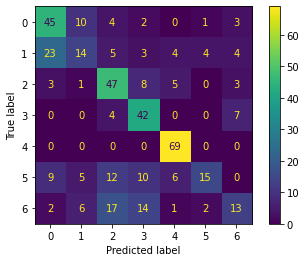

Confusion matrix for classifier:  Knn classifier


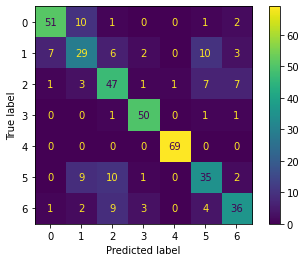

Confusion matrix for classifier:  Categorial naive bayes


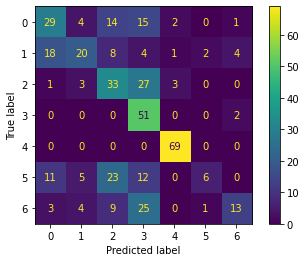

Confusion matrix for classifier:  Gaussian naive bayes


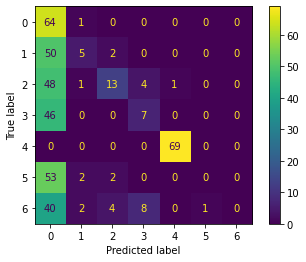

Confusion matrix for classifier:  random forest classifer


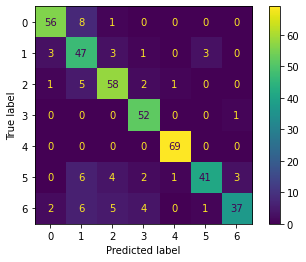

Confusion matrix for classifier:  random forest classifer (without tunning)


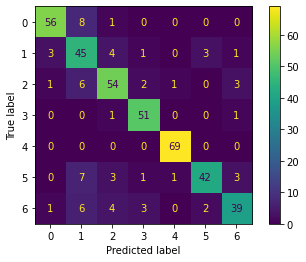

Confusion matrix for classifier:  AdaBoost classifier


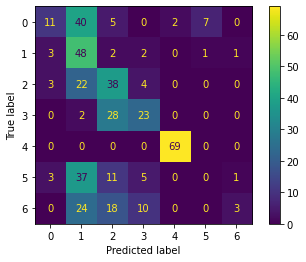

Confusion matrix for classifier:  AdaBoost classifier2 (without tunning)


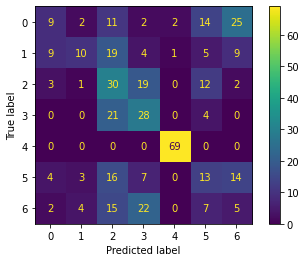

Confusion matrix for classifier:  XGBoost classifier


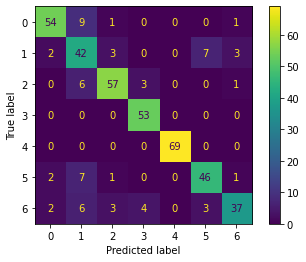

Confusion matrix for classifier:  XGBoost classifier2 (without tunning)


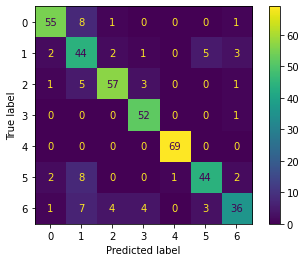

Confusion matrix for classifier:  CatBoost classifier


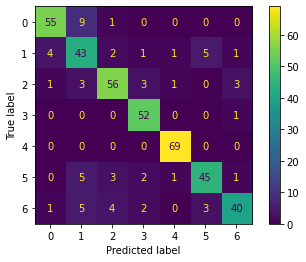

Confusion matrix for classifier:  CatBoost classifier2 (without tunning)


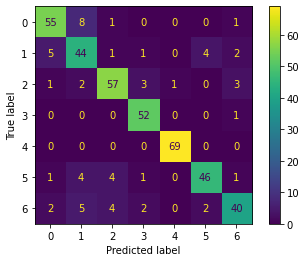

Confusion matrix for classifier:  Neural Network classifier


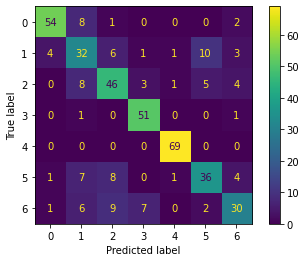

Confusion matrix for classifier:  Neural Network classifier2 (without tunning)


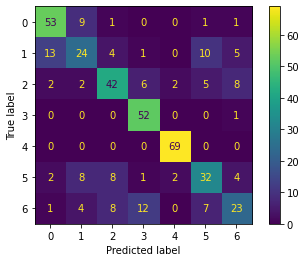

In [ ]:
# see each classifier's confusion matrix
for name, clf in dic.items():
    print('Confusion matrix for classifier: ', name)
    plot_confusion_matrix(clf, X_test_scaled, y_test)  
    plt.show()

## SuperLeaner

This part is about to write a superleaner follow with the steps in below:
0. Train each candidate learner on entire dataset
1. Split data into V blocks
2. Train each candidate learner
3. Predict the outcomes in the validation block based on the corresponding traning block candidate leaner
4. Model selection and fitting for the regression of the observed outcome onto the predicted outcomes from the cadidate leaner
5. Evaluate superlearner

In [ ]:
Image(url= "https://machinelearningmastery.com/wp-content/uploads/2019/10/Diagram-Showing-the-Data-Flow-of-the-Super-Learner-Algorithm.png")

In [ ]:
# Build a superlearner model 

dic = { 
        'Knn classifier': knn_clf,
        'random forest classifer':rf_clf,
        'random forest classifer (without tunning)': rf_clf_wt,
        'XGBoost classifier':XGBoost_clf,
        'XGBoost classifier2 (without tunning)':XGBoost_clf_wt,
        'CatBoost classifier':CatBoost_clf,
        'CatBoost classifier2 (without tunning)':CatBoost_clf_wt,
        'Neural Network classifier':nn_clf
      }

# initial train-test set 
X_train, X_val, y_train, y_val = X_train_validation, X_test, y_train_validaiton, y_test

# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

result_x = [] 
result_y = []

# Step 1.split data into V = 10 blocks 
k = 10
kf = KFold(n_splits=k, shuffle = True)

for train, test in kf.split(X_train):
    X_t , X_v = X_train[train],  X_train[test]
    y_t , y_v = y_train[train] , y_train[test]
    result_y.extend(y_v)
    predict_list = []

    # Step 2. train each candidate learner
    for clf in [i[1] for i in dic.items()]:
        clf.fit(X_t, y_t)
        
        # Step 3. Predict the outcomes in the validation block
        predict = clf.predict_proba(X_v)
        predict_list.append(predict)
    result_x.append(hstack(predict_list))

print(vstack(result_x).shape, asarray(result_y).shape)


0:	learn: 1.8000332	total: 55.3ms	remaining: 11s
1:	learn: 1.6740353	total: 105ms	remaining: 10.4s
2:	learn: 1.5794682	total: 160ms	remaining: 10.5s
3:	learn: 1.5060399	total: 211ms	remaining: 10.3s
4:	learn: 1.4319989	total: 263ms	remaining: 10.2s
5:	learn: 1.3669563	total: 333ms	remaining: 10.8s
6:	learn: 1.3135782	total: 384ms	remaining: 10.6s
7:	learn: 1.2654356	total: 444ms	remaining: 10.7s
8:	learn: 1.2235060	total: 510ms	remaining: 10.8s
9:	learn: 1.1753431	total: 574ms	remaining: 10.9s
10:	learn: 1.1297920	total: 634ms	remaining: 10.9s
11:	learn: 1.0948358	total: 687ms	remaining: 10.8s
12:	learn: 1.0591620	total: 750ms	remaining: 10.8s
13:	learn: 1.0257721	total: 808ms	remaining: 10.7s
14:	learn: 0.9939519	total: 858ms	remaining: 10.6s
15:	learn: 0.9696236	total: 907ms	remaining: 10.4s
16:	learn: 0.9413302	total: 993ms	remaining: 10.7s
17:	learn: 0.9180848	total: 1.08s	remaining: 11s
18:	learn: 0.8931999	total: 1.17s	remaining: 11.2s
19:	learn: 0.8717679	total: 1.28s	remaining:

In [ ]:
# Step 4: Create a meta model to fit the ovserved outcome onto the predicted outcomes from the candidate learners
meta_model = LogisticRegression()
meta_model.fit(vstack(result_x), asarray(result_y ))

# Step 0 : Train each candidate learner on entire dataset, since for the cross-validation part 2, 
# our classifier will be trained once, so, I move it here.
for i, (name, clf) in enumerate(dic.items()):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_validation)
    clf.fit(X_train_scaled, y_train_validaiton)

0:	learn: 1.8066067	total: 63.2ms	remaining: 12.6s
1:	learn: 1.6907819	total: 130ms	remaining: 12.8s
2:	learn: 1.5933989	total: 193ms	remaining: 12.7s
3:	learn: 1.5140510	total: 253ms	remaining: 12.4s
4:	learn: 1.4383226	total: 330ms	remaining: 12.9s
5:	learn: 1.3782137	total: 390ms	remaining: 12.6s
6:	learn: 1.3163716	total: 452ms	remaining: 12.5s
7:	learn: 1.2599339	total: 510ms	remaining: 12.2s
8:	learn: 1.2146944	total: 587ms	remaining: 12.5s
9:	learn: 1.1715151	total: 651ms	remaining: 12.4s
10:	learn: 1.1319221	total: 712ms	remaining: 12.2s
11:	learn: 1.0957587	total: 783ms	remaining: 12.3s
12:	learn: 1.0556893	total: 867ms	remaining: 12.5s
13:	learn: 1.0214884	total: 926ms	remaining: 12.3s
14:	learn: 0.9908066	total: 986ms	remaining: 12.2s
15:	learn: 0.9655039	total: 1.05s	remaining: 12s
16:	learn: 0.9380847	total: 1.14s	remaining: 12.2s
17:	learn: 0.9129758	total: 1.21s	remaining: 12.2s
18:	learn: 0.8885845	total: 1.27s	remaining: 12.1s
19:	learn: 0.8659823	total: 1.34s	remainin

In [ ]:
# Step 5 : Create a superlearner model and evaluate the super learner 

def superlearner(X):
    meta_input = []
    for i, (name, clf) in enumerate(dic.items()):
        predict = clf.predict_proba(X)
        meta_input.append(predict)
        
    return meta_model.predict(hstack(meta_input))

X_test_scaled = scaler.transform(X_test)
accuracy_score(superlearner(X_test_scaled),y_test )

0.8723404255319149